In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import tensorflow as tf
from tensorflow import keras as ks

from utils import load_training_data, load_testing_data, load_partition

In [12]:
# Split training and testing into an 80/20 split
X_train, X_val, y_train, y_val = load_training_data(0.2)

# merge training and validation (tensorflow will handle that for us)
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

# load test data
X_test, y_test = load_testing_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[1].shape)

(2870, 160, 160)
(394, 160, 160)
(2870,)
(394,)
(160, 160)


In [13]:
model = ks.Sequential([
    ks.layers.Flatten(input_shape=(160, 160)),
    ks.layers.Dense(128, activation='relu'),
    ks.layers.Dense(4)
])

model.compile(
    optimizer='adam',
    loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

num_epochs = 100

history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/100
90/90 [==============================] - 2s 19ms/step - loss: 2.1191 - accuracy: 0.4633 - val_loss: 2.7951 - val_accuracy: 0.3832
Epoch 2/100
90/90 [==============================] - 2s 17ms/step - loss: 0.8028 - accuracy: 0.6852 - val_loss: 2.6476 - val_accuracy: 0.4645
Epoch 3/100
90/90 [==============================] - 2s 17ms/step - loss: 0.5957 - accuracy: 0.7627 - val_loss: 2.2809 - val_accuracy: 0.4822
Epoch 4/100
90/90 [==============================] - 2s 17ms/step - loss: 0.5491 - accuracy: 0.7728 - val_loss: 2.8758 - val_accuracy: 0.5660
Epoch 5/100
90/90 [==============================] - 2s 17ms/step - loss: 0.3936 - accuracy: 0.8515 - val_loss: 2.4623 - val_accuracy: 0.5660
Epoch 6/100
90/90 [==============================] - 2s 17ms/step - loss: 0.3304 - accuracy: 0.8789 - val_loss: 2.3903 - val_accuracy: 0.6015
Epoch 7/100
90/90 [==============================] - 2s 17ms/step - loss: 0.3342 - accuracy: 0.8701 - val_loss: 2.7172 - val_accuracy: 0.6345
Epoch 

90/90 [==============================] - 1s 16ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 7.0726 - val_accuracy: 0.7386
Epoch 59/100
90/90 [==============================] - 1s 16ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 7.2133 - val_accuracy: 0.7386
Epoch 60/100
90/90 [==============================] - 2s 19ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 7.4338 - val_accuracy: 0.7386
Epoch 61/100
90/90 [==============================] - 2s 19ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 7.2804 - val_accuracy: 0.7386
Epoch 62/100
90/90 [==============================] - 2s 20ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 7.4259 - val_accuracy: 0.7386
Epoch 63/100
90/90 [==============================] - 2s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 7.4361 - val_accuracy: 0.7386
Epoch 64/100
90/90 [==============================] - 2s 19ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 7.5764 - val_accuracy: 0.7386
Epoch 65/100

In [14]:
# Test the model on unseen data
test_loss, test_acc = model.evaluate(X_test, y_test)


print(test_acc)

13/13 [==============================] - 0s 4ms/step - loss: 9.2133 - accuracy: 0.7386
0.7385786771774292


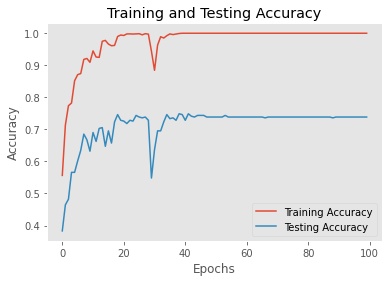

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(num_epochs)

plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Testing Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
#plt.show()
plt.savefig("ML.jpg")

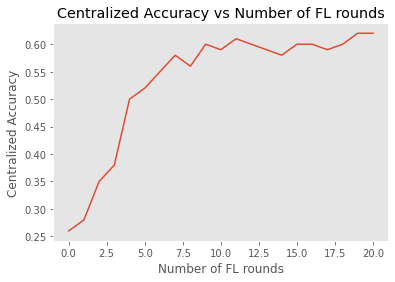

In [18]:
num_rounds = range(21)
accs = [0.26, 0.28, 0.35, 0.38, 0.5, 0.52, 0.55, 0.58, 0.56, 0.60, 0.59, 0.61, 0.60, 0.59, 0.58, 0.60, 0.60, 0.59, 0.60, 0.62, 0.62]

plt.plot(num_rounds, accs, label="Centralized Accuracy")
plt.xlabel("Number of FL rounds")
plt.ylabel("Centralized Accuracy")
plt.title("Centralized Accuracy vs Number of FL rounds")
plt.grid()
plt.savefig("FL.jpg")
#plt.show()

## One Partition/Client demonstration

Epoch 1/50
23/23 [==============================] - 1s 27ms/step - loss: 5.4177 - accuracy: 0.3423 - val_loss: 2.8472 - val_accuracy: 0.2208
Epoch 2/50
23/23 [==============================] - 1s 22ms/step - loss: 0.9066 - accuracy: 0.6364 - val_loss: 2.6334 - val_accuracy: 0.3223
Epoch 3/50
23/23 [==============================] - 1s 23ms/step - loss: 0.8283 - accuracy: 0.6359 - val_loss: 2.6806 - val_accuracy: 0.3147
Epoch 4/50
23/23 [==============================] - 1s 24ms/step - loss: 0.6733 - accuracy: 0.7590 - val_loss: 2.3589 - val_accuracy: 0.3655
Epoch 5/50
23/23 [==============================] - 0s 21ms/step - loss: 0.5727 - accuracy: 0.7981 - val_loss: 2.6168 - val_accuracy: 0.3655
Epoch 6/50
23/23 [==============================] - 0s 21ms/step - loss: 0.5467 - accuracy: 0.7621 - val_loss: 2.6891 - val_accuracy: 0.3985
Epoch 7/50
23/23 [==============================] - 0s 21ms/step - loss: 0.4489 - accuracy: 0.8418 - val_loss: 2.9111 - val_accuracy: 0.3985
Epoch 8/50
23

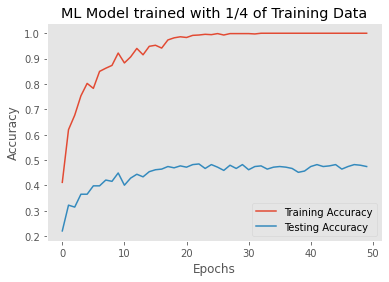

In [20]:
# Split training and testing into an 80/20 split
X_train, X_val, y_train, y_val = load_partition(0)

# merge training and validation (tensorflow will handle that for us)
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

# load test data
X_test, y_test = load_testing_data()

model = ks.Sequential([
    ks.layers.Flatten(input_shape=(160, 160)),
    ks.layers.Dense(128, activation='relu'),
    ks.layers.Dense(4)
])

model.compile(
    optimizer='adam',
    loss=ks.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

num_epochs = 50

history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(num_epochs)

plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Testing Accuracy")
plt.legend(loc="lower right")
plt.title("ML Model trained with 1/4 of Training Data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
#plt.show()
plt.savefig("quarter_training_ML.jpg")